In [1]:
#Showing directories’ size
import os, shutil

train_dir ='./images/train'
validation_dir = './images/val'
test_dir = './images/test'

train_corona_virus_d = './images/train/Corona_Virus_Disease'
train_normal = './images/train/Normal'
train_tuberculosis= './images/train/Tuberculosis'

val_corona_virus_d = './images/val/Corona_Virus_Disease'
val_normal = './images/val/Normal'
val_tuberculosis= './images/val/Tuberculosis'

test_corona_virus_d = './images/test/Corona_Virus_Disease'
test_normal = './images/test/Normal'
test_tuberculosis= './images/test/Tuberculosis'


print('total train corona virus images:', len(os.listdir(train_corona_virus_d)))
print('total train normal images:', len(os.listdir(train_normal)))
print('total train tuberculosis images:', len(os.listdir(train_tuberculosis)))


print('total validation corona virus images:', len(os.listdir(val_corona_virus_d)))
print('total validation normal images:', len(os.listdir(val_normal)))
print('total validation tuberculosis images:', len(os.listdir(val_tuberculosis)))


print('total testing organic corona virus img:', len(os.listdir(test_corona_virus_d)))
print('total testing recicle normal imgs:', len(os.listdir(test_normal)))
print('total testing recicle tuberculosis img:', len(os.listdir(test_tuberculosis)))

total train corona virus images: 1218
total train normal images: 1207
total train tuberculosis images: 1220
total validation corona virus images: 406
total validation normal images: 402
total validation tuberculosis images: 406
total testing organic corona virus img: 407
total testing recicle normal imgs: 404
total testing recicle tuberculosis img: 408


In [3]:
from keras.utils import image_dataset_from_directory

IMG_SIZE = 150
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
)

validation_dataset = image_dataset_from_directory(
validation_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=64)
test_dataset = image_dataset_from_directory(
test_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=64)

Found 3645 files belonging to 3 classes.
Found 1214 files belonging to 3 classes.
Found 1219 files belonging to 3 classes.


In [4]:
import tensorflow as tf
def process_image(image, label_pi):
    l = tf.one_hot(label_pi, depth=3)
    return image, l

In [5]:
train_dataset = train_dataset.map(process_image)
validation_dataset = validation_dataset.map(process_image)
test_dataset = test_dataset.map(process_image)

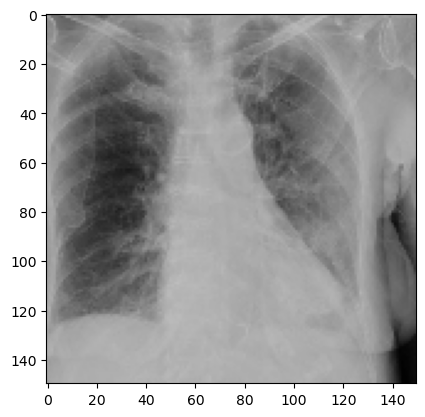

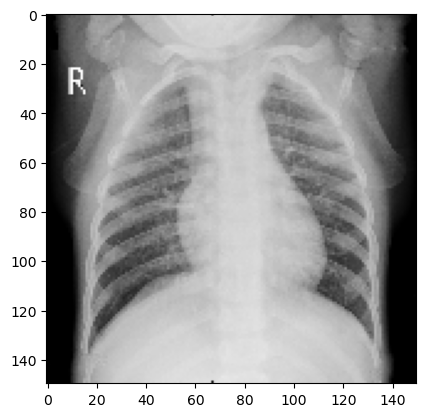

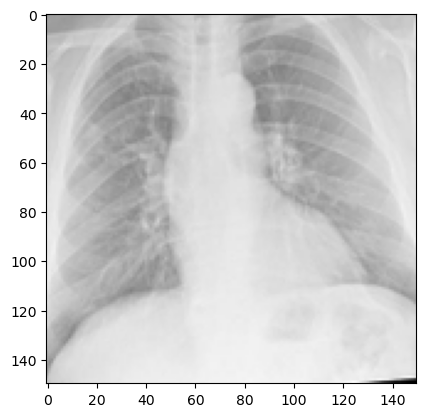

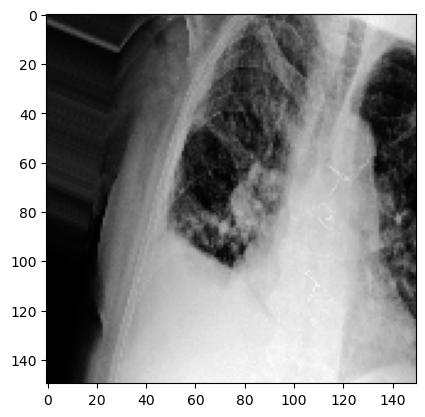

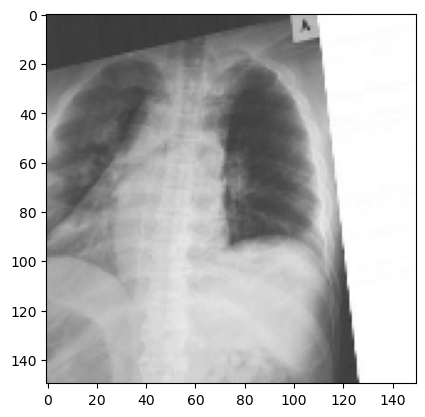

2024-05-31 14:33:43.109565: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:
#Viewing the first 5 images of the first batch
import matplotlib.pyplot as plt
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [64]:
from tensorflow import keras
from keras import layers
from keras import models
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
# x = layers.Conv2D(filters=32, kernel_size=12, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=7, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=5, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=5, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(2048, activation="relu")(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_12 (Rescaling)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 144, 144, 32)   │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (None, 72, 72, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 68, 68, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 30, 30, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 13, 13, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 2048)           │    18,876,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │         6,147 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,438,659 (74.15 MB)

 Trainable params: 19,438,659 (74.15 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
import tensorflow as tf
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-6),
    metrics=['acc'])

In [71]:
ACCURACY_THRESHOLD = 0.93
class CallbackModel(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if logs.get('acc') > ACCURACY_THRESHOLD:
            print("\nReached %2.2f%% accuracy, so stopping training" %(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True

In [72]:
history = model.fit(
    train_dataset,
    epochs=40,
    validation_data=validation_dataset,
    verbose=1,
    callbacks=[CallbackModel()]
)

# model.save('./weights_xray/Model_xray.h5')

Epoch 1/40
114/114 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - acc: 0.3726 - loss: 1.0951 - val_acc: 0.4843 - val_loss: 1.0798
Epoch 2/40
114/114 ━━━━━━━━━━━━━━━━━━━━ 15s 127ms/step - acc: 0.4286 - loss: 1.0748 - val_acc: 0.5272 - val_loss: 1.0668
Epoch 3/40
114/114 ━━━━━━━━━━━━━━━━━━━━ 15s 127ms/step - acc: 0.4706 - loss: 1.0629 - val_acc: 0.5610 - val_loss: 1.0541
Epoch 4/40
114/114 ━━━━━━━━━━━━━━━━━━━━ 15s 128ms/step - acc: 0.5276 - loss: 1.0485 - val_acc: 0.5799 - val_loss: 1.0397
Epoch 5/40
114/114 ━━━━━━━━━━━━━━━━━━━━ 15s 128ms/step - acc: 0.5499 - loss: 1.0343 - val_acc: 0.6664 - val_loss: 1.0234
Epoch 6/40
114/114 ━━━━━━━━━━━━━━━━━━━━ 15s 128ms/step - acc: 0.6194 - loss: 1.0161 - val_acc: 0.7068 - val_loss: 1.0060
Epoch 7/40
114/114 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - acc: 0.6792 - loss: 0.9983 - val_acc: 0.7718 - val_loss: 0.9879
Epoch 8/40
114/114 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - acc: 0.7283 - loss: 0.9808 - val_acc: 0.7924 - val_loss: 0.9668
Epoch 9/40
114/114 ━━━━━━━━━━━━━

In [81]:
model.save('./Model_xray.keras')

In [73]:
val_loss, val_acc = model.evaluate(validation_dataset)
print('val_acc:', val_acc)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - acc: 0.8461 - loss: 0.4634
val_acc: 0.8542009592056274


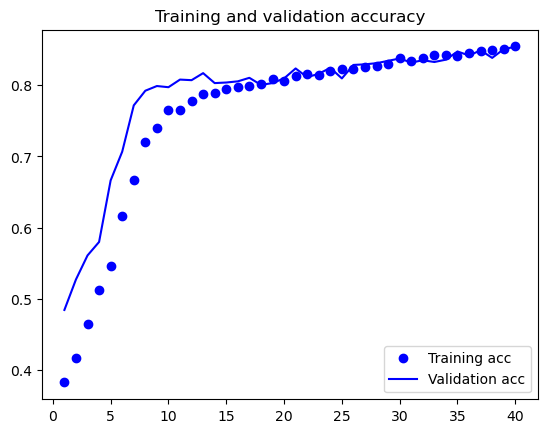

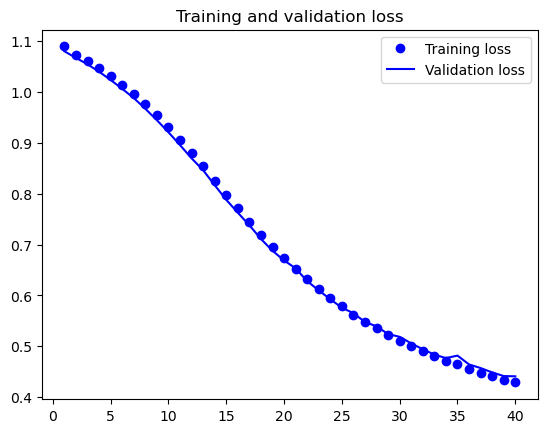

In [74]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show() 

In [75]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

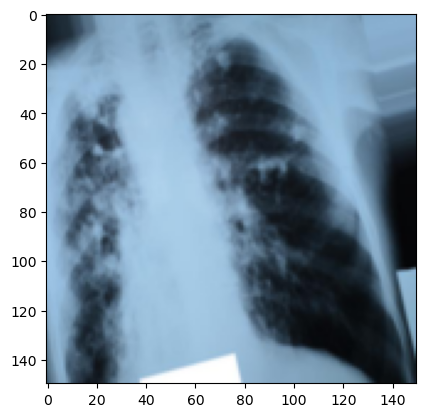

(1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Class index: [2]
One-hot encoded prediction: [[0. 0. 1.]]


In [76]:

# img = tf.keras.preprocessing.image.load_img('./train/cats/cat.1.jpg', target_size=(150, 150), interpolation='bilinear')
img = tf.keras.preprocessing.image.load_img('./images/val/Tuberculosis/test_0_274.jpeg', target_size=(150, 150), interpolation='bilinear')
plt.imshow(img)
plt.show()
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
print(img_array.shape)
result = model.predict(img_array)

# Convert prediction to class index (0, 1, 2)
class_index = np.argmax(result, axis=1)

# Convert class index to one-hot encoded vector
one_hot_prediction = to_categorical(class_index, num_classes=3)

# Print the result
print("Class index:", class_index)
print("One-hot encoded prediction:", one_hot_prediction)


114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step
[[1.30071893e-01 7.87487507e-01 8.24406520e-02]
 [7.56770432e-01 1.98487774e-01 4.47418317e-02]
 [1.11890142e-03 7.89046346e-04 9.98091996e-01]
 ...
 [4.21776902e-03 1.02225305e-04 9.95679975e-01]
 [8.64076391e-02 7.89811015e-01 1.23781309e-01]
 [6.49182558e-01 1.09991305e-01 2.40826130e-01]]


2024-05-31 16:29:39.294853: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


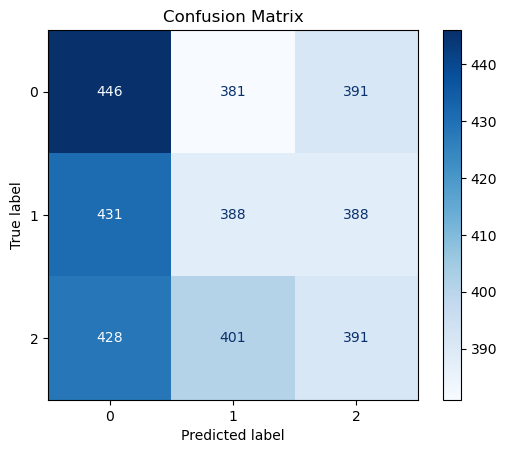

In [77]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predicted_labels = model.predict(train_dataset)
print(predicted_labels)
predicted_labels = np.argmax(predicted_labels, axis=1) 

true_labels = []
for _, label in train_dataset:
    true_labels.extend(label.numpy())
true_labels = np.array(true_labels)

if len(true_labels.shape) > 1:
    true_labels = np.argmax(true_labels, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)

labels = ['0', '1', '2']  
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
